In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
del_columns = []
pd.set_option('display.float_format', '{:.4f}'.format)

url = "https://www.dropbox.com/scl/fi/uvv7j1bragzqkz9zwyvj0/sample_mmp.csv?rlkey=i0mlaxzq6e3blblfu9mhrdpsm&e=1&dl=1"
df = pd.read_csv(url)
df.head(2)

C:\Users\uvmar\AppData\Local\Temp\ipykernel_44500\2028297110.py:5: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0000,0,NaN,...,19951.0000,0,NaN,0.0000,0,0,0.0000,0.0000,11.0000,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0000,0,NaN,...,48753.0000,0,0.0000,0.0000,0,0,0.0000,1.0000,3.0000,0


# Revisión de columnas - Marc. de la 42 a la 62 (incluidas)


In [3]:
list(df.columns[42:63])

['Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName']

Columnas a revisar:
['Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName']

In [4]:
len(df)

500000

### "Census_ProcessorClass"
Descripción: "Clase" del procesador del dispositivo

In [5]:
df["Census_ProcessorClass"].value_counts(dropna=False)

Census_ProcessorClass
NaN     497918
mid       1196
low        546
high       340
Name: count, dtype: int64

In [6]:
# 497_918 / 500_000 son nulos, por lo que eliminaremos la columna
del_columns.append("Census_ProcessorClass")

### "Census_PrimaryDiskTotalCapacity"
Descripción: Capacidad total del disco duro primario en MB

In [7]:
df["Census_PrimaryDiskTotalCapacity"].value_counts(dropna=False)

Census_PrimaryDiskTotalCapacity
476940.0000    158683
953869.0000    122183
305245.0000     26687
122104.0000     26444
244198.0000     25159
                ...  
117243.0000         1
455879.0000         1
473410.0000         1
238445.0000         1
31094.0000          1
Name: count, Length: 1104, dtype: int64

In [8]:
# contamos nulos
df["Census_PrimaryDiskTotalCapacity"].isna().sum()  # 2968 nulos

np.int64(2976)

In [9]:
# miramos la correlación con el target
df[["Census_PrimaryDiskTotalCapacity", "HasDetections"]].corr()

,Census_PrimaryDiskTotalCapacity,HasDetections
Census_PrimaryDiskTotalCapacity,1.0000,0.0480
HasDetections,0.0480,1.0000


Difícilmente la capacidad del disco duro puede tener relación con la detección de malware, por lo que eliminaremos la columna.

In [10]:
del_columns.append("Census_PrimaryDiskTotalCapacity")

### "Census_PrimaryDiskTypeName"
Descripción: Tipo de disco duro primario

In [11]:
df["Census_PrimaryDiskTypeName"].value_counts(dropna=False)

Census_PrimaryDiskTypeName
HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
NaN               709
Name: count, dtype: int64

In [12]:
# juntamos valores poco frecuentes (UNKKNOWN, Unspecified) a "Indefinido"
df["Census_PrimaryDiskTypeName"] = df["Census_PrimaryDiskTypeName"].replace(["UNKNOWN", "Unspecified"], "Indefinido")
# rellenamos nulos con "Indefinido"
df["Census_PrimaryDiskTypeName"] = df["Census_PrimaryDiskTypeName"].fillna("Indefinido")

In [13]:
df["Census_PrimaryDiskTypeName"].value_counts(dropna=False)

Census_PrimaryDiskTypeName
HDD           325429
SSD           138155
Indefinido     36416
Name: count, dtype: int64

Se propone realizar un OHE con esta columna.

In [14]:
df = pd.get_dummies(df, columns=["Census_PrimaryDiskTypeName"], prefix="Census_PrimaryDiskTypeName")  # TODO: revisar
del_columns.append("Census_PrimaryDiskTypeName")

### "Census_SystemVolumeTotalCapacity"
Descripción: Capacidad total del volumen del sistema en MB

In [15]:
df["Census_SystemVolumeTotalCapacity"].value_counts(dropna=False)

Census_SystemVolumeTotalCapacity
NaN            2976
28542.0000     2922
926992.0000    2866
476389.0000    2380
476324.0000    2306
               ... 
180237.0000       1
89219.0000        1
914079.0000       1
199588.0000       1
431979.0000       1
Name: count, Length: 142052, dtype: int64

<Axes: >

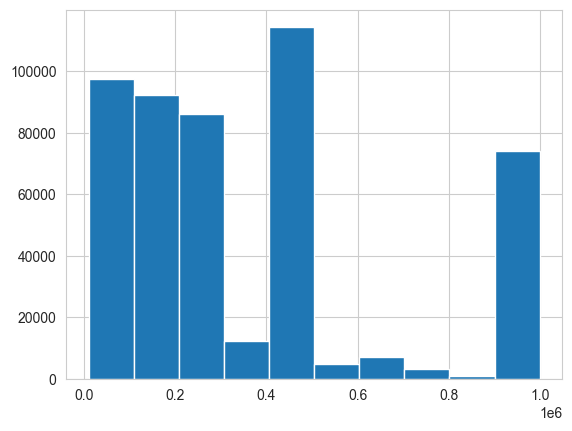

In [16]:
# hacemos un histograma
df[df["Census_SystemVolumeTotalCapacity"] < 1_000_000]["Census_SystemVolumeTotalCapacity"].hist()

In [17]:
# correlación con el target
df[["Census_SystemVolumeTotalCapacity", "HasDetections"]].corr()

,Census_SystemVolumeTotalCapacity,HasDetections
Census_SystemVolumeTotalCapacity,1.0000,0.0136
HasDetections,0.0136,1.0000


In [18]:
# mismo argumento que "Census_PrimaryDiskTotalCapacity", eliminamos la columna
del_columns.append("Census_SystemVolumeTotalCapacity")

### "Census_HasOpticalDiskDrive"
Descripción: Indica si el dispositivo tiene una unidad de disco óptico

In [19]:
df["Census_HasOpticalDiskDrive"].value_counts(dropna=False)

Census_HasOpticalDiskDrive
0    461483
1     38517
Name: count, dtype: int64

In [20]:
38_517 / 500_000  # 7.7% True

0.077034

In [21]:
# correlación con el target
df[["Census_HasOpticalDiskDrive", "HasDetections"]].corr()

,Census_HasOpticalDiskDrive,HasDetections
Census_HasOpticalDiskDrive,1.0000,0.0201
HasDetections,0.0201,1.0000


In [22]:
# TODO: Muy poca correlación, la dejamos pero la podríamos borrar perfectamente (dependerá de los resultados de los modelos)

### "Census_TotalPhysicalRAM"
Descripción: Cantidad de RAM física en MB

In [23]:
df["Census_TotalPhysicalRAM"].value_counts(dropna=False)

Census_TotalPhysicalRAM
4096.0000     228678
8192.0000     123174
2048.0000      61694
16384.0000     30179
6144.0000      22349
               ...  
11168.0000         1
11263.0000         1
9412.0000          1
42000.0000         1
3967.0000          1
Name: count, Length: 553, dtype: int64

In [24]:
#  pasamos a GB
df["Census_TotalPhysicalRAM"].apply(lambda x: x // 1024).value_counts().sort_index()

Census_TotalPhysicalRAM
0.0000          40
1.0000        4218
2.0000       62111
3.0000        8980
4.0000      228739
5.0000         485
6.0000       22393
7.0000         339
8.0000      123190
9.0000          44
10.0000        607
11.0000         37
12.0000       9081
13.0000          2
14.0000         92
15.0000         50
16.0000      30184
18.0000         28
19.0000          5
20.0000        238
21.0000          2
22.0000          5
23.0000          5
24.0000        701
25.0000          1
26.0000          1
27.0000          1
28.0000         15
29.0000          1
30.0000          2
31.0000          5
32.0000       3308
35.0000          1
36.0000          8
40.0000         20
41.0000          1
44.0000          3
48.0000         57
50.0000          1
52.0000          2
56.0000          2
60.0000          1
64.0000        349
66.0000          1
69.0000          1
72.0000          5
95.0000          1
96.0000          8
100.0000         1
112.0000         1
128.0000        57
149.000

In [25]:
"""
Opciones:
1. Eliminar la columna por (alomejor) no tener relación con el target
2. Eliminamos los registros con valores "anormales" o "poco frecuentes"
3. Otra (a definir)
"""

# OPCIÓN 2!
# convertimos a GB
df["Census_TotalPhysicalRAM_GB"] = df["Census_TotalPhysicalRAM"].apply(lambda x: x // 1024)

In [26]:
# nulos
df["Census_TotalPhysicalRAM_GB"].isna().sum()  # 4556 nulos

np.int64(4556)

In [27]:
# Buscamos aquellos valores de RAM que tengan más de 1000 filas en caso de RAM < 20 GB y de más de 100 filas en caso de RAM >= 20 GB
recuento_RAM = df["Census_TotalPhysicalRAM_GB"].value_counts().sort_index()
a = recuento_RAM.iloc[:20][recuento_RAM.iloc[:20] > 1000] # RAM < 20 GB
b = recuento_RAM.iloc[20:][recuento_RAM.iloc[20:] > 100] # RAM >= 20 GB

In [28]:
ram_elecciones = a.index.tolist() + b.index.tolist()
ram_elecciones  # valores más frecuentes, nos quedamos con los registros que contenegan estos valores

[1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 12.0, 16.0, 24.0, 32.0, 64.0]

In [29]:
# filtramos por los registros que tengan la RAM que hemos seleccionado
df = df[df["Census_TotalPhysicalRAM_GB"].isin(ram_elecciones)]  # indirecamente eliminamos los nulos

In [30]:
print(f"Recuento de registros actuales: {len(df)}")  # 493_254, 6746 menos
df["Census_TotalPhysicalRAM_GB"].value_counts()

Recuento de registros actuales: 493254


Census_TotalPhysicalRAM_GB
4.0000     228739
8.0000     123190
2.0000      62111
16.0000     30184
6.0000      22393
12.0000      9081
3.0000       8980
1.0000       4218
32.0000      3308
24.0000       701
64.0000       349
Name: count, dtype: int64

In [31]:
# correlación con el target
df[["Census_TotalPhysicalRAM_GB", "HasDetections"]].corr()

,Census_TotalPhysicalRAM_GB,HasDetections
Census_TotalPhysicalRAM_GB,1.0000,0.0679
HasDetections,0.0679,1.0000


In [ ]:
# correlación del 7% -> proponemos mantener la columna

### "Census_ChassisTypeName"
Descripción: Tipo de chasis del dispositivo

In [32]:
df["Census_ChassisTypeName"].value_counts(dropna=False)

Census_ChassisTypeName
Notebook               291985
Desktop                103169
Laptop                  37992
Portable                20058
AllinOne                11341
MiniTower                4715
Convertible              4650
Other                    3274
Detachable               2917
LowProfileDesktop        2844
UNKNOWN                  2806
HandHeld                 2647
SpaceSaving              1665
Tablet                    726
Tower                     637
Unknown                   551
MainServerChassis         480
MiniPC                    255
LunchBox                  221
RackMountChassis          162
SubNotebook                45
BusExpansionChassis        38
NaN                        35
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
PizzaBox                    3
35                          3
SubChassis                  2
31                          2
Blade                       2
32               

In [33]:
# Convertir la variable string en variables dummy
df_dummies = pd.get_dummies(df['Census_ChassisTypeName'], prefix='Census_ChassisTypeName')

# Calcular la correlación de cada variable dummy con el target
correlations = df_dummies.corrwith(df['HasDetections'])

correlations

Census_ChassisTypeName_0                     -0.0006
Census_ChassisTypeName_25                    -0.0014
Census_ChassisTypeName_30                    -0.0021
Census_ChassisTypeName_31                     0.0020
Census_ChassisTypeName_32                     0.0014
Census_ChassisTypeName_35                    -0.0008
Census_ChassisTypeName_AllinOne               0.0034
Census_ChassisTypeName_Blade                 -0.0020
Census_ChassisTypeName_BusExpansionChassis   -0.0018
Census_ChassisTypeName_Convertible           -0.0038
Census_ChassisTypeName_Desktop                0.0255
Census_ChassisTypeName_Detachable            -0.0235
Census_ChassisTypeName_ExpansionChassis      -0.0014
Census_ChassisTypeName_HandHeld              -0.0301
Census_ChassisTypeName_Laptop                -0.0043
Census_ChassisTypeName_LowProfileDesktop      0.0022
Census_ChassisTypeName_LunchBox              -0.0016
Census_ChassisTypeName_MainServerChassis     -0.0036
Census_ChassisTypeName_MiniPC                -

In [34]:
# Correlaciones < 0.04 -> proponemos eliminar la columna
del_columns.append("Census_ChassisTypeName")

In [35]:
df.head(2)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_Indefinido,Census_PrimaryDiskTypeName_SSD,Census_TotalPhysicalRAM_GB
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0000,0,NaN,...,0,0,0.0000,0.0000,11.0000,1,True,False,False,8.0000
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0000,0,NaN,...,0,0,0.0000,1.0000,3.0000,0,True,False,False,8.0000


### "Census_InternalPrimaryDiagonalDisplaySizeInInches"
Descripción: Tamaño diagonal de la pantalla en pulgadas

In [36]:
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].value_counts(dropna=False)

Census_InternalPrimaryDiagonalDisplaySizeInInches
15.5000    169881
13.9000     52467
14.0000     30155
11.6000     17403
21.5000     15152
            ...  
38.9000         1
40.6000         1
29.9000         1
70.7000         1
95.4000         1
Name: count, Length: 514, dtype: int64

<Axes: >

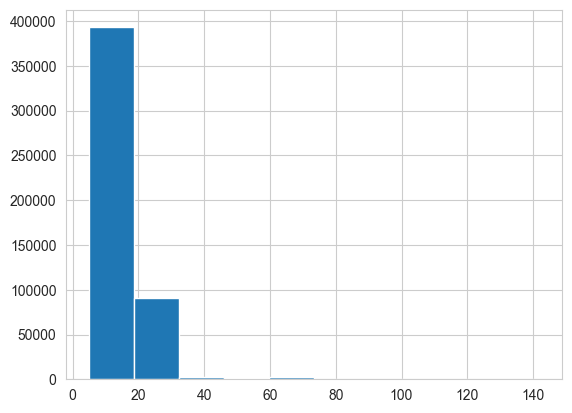

In [37]:
# hist
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].hist()

In [38]:
# se deduce una muy baja correlación con el target, eliminamos la columna  # TODO
del_columns.append("Census_InternalPrimaryDiagonalDisplaySizeInInches")

In [39]:
# correlación con el target
df[["Census_InternalPrimaryDiagonalDisplaySizeInInches", "HasDetections"]].corr()

,Census_InternalPrimaryDiagonalDisplaySizeInInches,HasDetections
Census_InternalPrimaryDiagonalDisplaySizeInInches,1.0000,0.0334
HasDetections,0.0334,1.0000


### "Census_InternalPrimaryDisplayResolutionHorizontal" y "Census_InternalPrimaryDisplayResolutionVertical"
Descripción: Resolución de la pantalla

In [40]:
df["Census_InternalPrimaryDisplayResolutionHorizontal"].value_counts(dropna=False)

Census_InternalPrimaryDisplayResolutionHorizontal
1366.0000    249926
1920.0000    123065
1280.0000     29213
1600.0000     27882
1024.0000     18685
              ...  
936.0000          1
2238.0000         1
1515.0000         1
1245.0000         1
698.0000          1
Name: count, Length: 393, dtype: int64

In [41]:
df["Census_InternalPrimaryDisplayResolutionVertical"].value_counts(dropna=False)

Census_InternalPrimaryDisplayResolutionVertical
768.0000     274965
1080.0000    119260
900.0000      36383
800.0000      14545
1024.0000     10337
              ...  
1574.0000         1
4320.0000         1
1089.0000         1
1379.0000         1
1648.0000         1
Name: count, Length: 421, dtype: int64

In [42]:
# misma argumentación que "Census_InternalPrimaryDiagonalDisplaySizeInInches", proponemos eliminar las columnas
del_columns.append("Census_InternalPrimaryDisplayResolutionHorizontal")
del_columns.append("Census_InternalPrimaryDisplayResolutionVertical")

### "Census_PowerPlatformRoleName"
Descripción: Nombre del rol de la plataforma de energía

In [43]:
df["Census_PowerPlatformRoleName"].value_counts(dropna=False)  # no tiene nulos

Census_PowerPlatformRoleName
Mobile               343361
Desktop              113532
Slate                 27360
Workstation            6060
SOHOServer             2007
UNKNOWN                 361
EnterpriseServer        358
AppliancePC             212
PerformanceServer         3
Name: count, dtype: int64

In [44]:
# juntamos columnas [SOHOServer, EnterpriseServer, PerformanceServer] en "Server"
df["Census_PowerPlatformRoleName"] = df["Census_PowerPlatformRoleName"].replace(["SOHOServer", "EnterpriseServer", "PerformanceServer"], "Server")

In [45]:
# borramos registros con nulos (con valor UNKNOWN)
df = df[df["Census_PowerPlatformRoleName"] != "UNKNOWN"]

In [46]:
df["Census_PowerPlatformRoleName"].value_counts(dropna=False)

Census_PowerPlatformRoleName
Mobile         343361
Desktop        113532
Slate           27360
Workstation      6060
Server           2368
AppliancePC       212
Name: count, dtype: int64

In [47]:
# hay únicamente 6 valores únicos, es una variable categórica, proponemos hacer un OHE
df = pd.get_dummies(df, columns=["Census_PowerPlatformRoleName"], prefix="Census_PowerPlatformRoleName")  # TODO
del_columns.append("Census_PowerPlatformRoleName")

### "Census_InternalBatteryType"
Descripción: Tipo de batería interna

In [48]:
df["Census_InternalBatteryType"].value_counts(dropna=False)

Census_InternalBatteryType
NaN     349717
lion    112765
li-i     13774
#         9915
lip       3314
liio      1775
li p       463
li         351
nimh       268
real       162
bq20       142
pbac       128
lgi0        29
unkn        19
lipo        13
lhp0        12
vbox        11
ithi         7
4cel         6
ram          5
batt         3
bad          3
lipp         3
virt         2
a132         2
li-l         1
lgl0         1
icp3         1
3ion         1
Name: count, dtype: int64

In [49]:
# interpeteción: hay 348_471 nulos y se puede presuponer una alta correlación entre el tipo de batería y el tipo de dispositivo -> eliminamos la columna #TODO: comprobar
del_columns.append("Census_InternalBatteryType")

### "Census_InternalBatteryNumberOfCharges"
Descripción: Número de cargas de la batería interna

In [50]:
df["Census_InternalBatteryNumberOfCharges"].value_counts(dropna=False)

Census_InternalBatteryNumberOfCharges
0.0000             281300
4294967295.0000    124318
NaN                 12267
1.0000               2928
16.0000              1491
                    ...  
57868.0000              1
30492.0000              1
1769.0000               1
38289.0000              1
51948.0000              1
Name: count, Length: 5235, dtype: int64

In [51]:
# 1. se presupone que serà una variable contínua
# 2. nulos: hay directamente 12204 NaNs (2.5%) pero se observa unos registros extremadamente altos de 4294967295 y 4294967294. Estos valores provienen de un error en la recogida de datos, 4294967295 es el valor máximo de un entero de 32 bits (2^32 - 1). Hay 123_658 y 656 registros respectivamente (24.9% y 0.1%). Demasiados registros para eliminarlos, se propone rellenar los nulos con la media de la columna.

# TODO: exponer al grupo
# calculamos media evitando los valores erróneos
mean_charges = df[df["Census_InternalBatteryNumberOfCharges"] < 4_000_000_000]["Census_InternalBatteryNumberOfCharges"].mean()
df["Census_InternalBatteryNumberOfCharges"] = df["Census_InternalBatteryNumberOfCharges"].fillna(mean_charges)

In [52]:
# vamos los registros fallidos
df[df["Census_InternalBatteryNumberOfCharges"] > 4_000_000_000]
# observamos que los registros con valor 4294967295 son los que tienen nulos en la columna "Census_InternalBatteryType" -> comportamiento esperado

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_Indefinido,Census_PrimaryDiskTypeName_SSD,Census_TotalPhysicalRAM_GB,Census_PowerPlatformRoleName_AppliancePC,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_Server,Census_PowerPlatformRoleName_Slate,Census_PowerPlatformRoleName_Workstation
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0000,0,NaN,...,True,False,False,8.0000,False,True,False,False,False,False
10,844555,1843aa258152c018f0298a8ba9915ebd,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1552.0,0,7.0000,0,NaN,...,False,False,True,4.0000,False,True,False,False,False,False
12,2382707,4458ad1edb42d5f05ac868afa37f628e,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1112.0,0,7.0000,0,NaN,...,True,False,False,4.0000,False,True,False,False,False,False
16,5951649,aad1e798db865780f340539c0429934d,win8defender,1.1.15100.1,4.18.1806.18062,1.273.356.0,0,7.0000,0,NaN,...,True,False,False,4.0000,False,True,False,False,False,False
19,2797061,503ff9f5e17315afd880eb6745316439,win8defender,1.1.15200.1,4.18.1807.18075,1.275.948.0,0,7.0000,0,NaN,...,False,True,False,4.0000,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499979,5253164,96c417e49191b49f11c51314fe27e5c4,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1140.0,0,7.0000,0,NaN,...,True,False,False,3.0000,False,True,False,False,False,False
499988,959036,1b8d39b74872ef5de9f9c9ca43424d79,win8defender,1.1.15200.1,4.18.1807.18075,1.275.260.0,0,7.0000,0,NaN,...,False,True,False,4.0000,False,True,False,False,False,False
499994,5802201,a687cfd1252ee03ce9658eaf15bdf40e,win8defender,1.1.15200.1,4.9.10586.1106,1.275.155.0,0,7.0000,0,2132.0000,...,True,False,False,4.0000,False,False,True,False,False,False
499997,8819786,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,0,7.0000,0,NaN,...,True,False,False,4.0000,False,True,False,False,False,False


In [53]:
# se imputan los valores erróneos con la media
mask = df["Census_InternalBatteryNumberOfCharges"] > 4_000_000_000
df.loc[mask, "Census_InternalBatteryNumberOfCharges"] = mean_charges

<Axes: >

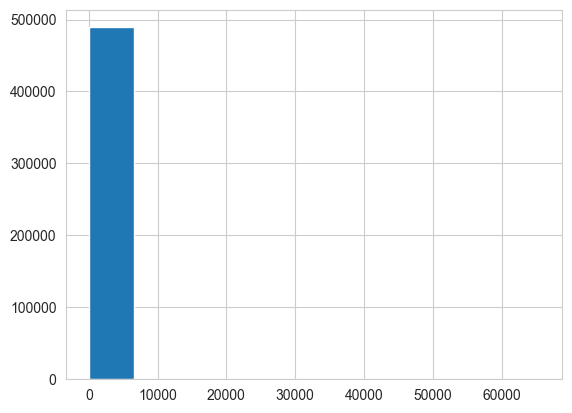

In [54]:
# hist
df["Census_InternalBatteryNumberOfCharges"].hist()

In [55]:
df['Census_InternalBatteryNumberOfCharges'].value_counts(dropna=False)

Census_InternalBatteryNumberOfCharges
0.0000        281300
383.0726      137243
1.0000          2928
16.0000         1491
2.0000          1490
               ...  
57868.0000         1
30492.0000         1
1769.0000          1
38289.0000         1
51948.0000         1
Name: count, Length: 5233, dtype: int64

In [56]:
# miramos registros con valor 0
df[df["Census_InternalBatteryNumberOfCharges"] == 0]

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_Indefinido,Census_PrimaryDiskTypeName_SSD,Census_TotalPhysicalRAM_GB,Census_PowerPlatformRoleName_AppliancePC,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_Server,Census_PowerPlatformRoleName_Slate,Census_PowerPlatformRoleName_Workstation
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0000,0,NaN,...,True,False,False,8.0000,False,False,True,False,False,False
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0000,0,NaN,...,False,False,True,8.0000,False,False,True,False,False,False
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0000,0,NaN,...,True,False,False,4.0000,False,False,True,False,False,False
5,3771983,6c3ff3036d3ecc96729a615653742608,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,0,7.0000,0,NaN,...,True,False,False,4.0000,False,False,True,False,False,False
6,4833329,8ab73b7f8dbb0d0d57f54a8b4799e960,win8defender,1.1.15200.1,4.18.1807.18075,1.275.497.0,0,7.0000,0,NaN,...,True,False,False,2.0000,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,1052146,1e395f5a138a77514322a1201de81a27,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1665.0,0,7.0000,0,NaN,...,False,False,True,8.0000,False,False,True,False,False,False
499993,7526638,d7f1b593177768d66a2905b09a43a4d5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0000,0,NaN,...,True,False,False,2.0000,False,False,True,False,False,False
499995,5826339,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,0,7.0000,0,NaN,...,True,False,False,4.0000,False,False,True,False,False,False
499996,5740034,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,0,7.0000,0,NaN,...,False,False,True,8.0000,False,False,True,False,False,False


In [57]:
# correlación con el target
df[["Census_InternalBatteryNumberOfCharges", "HasDetections"]].corr()

,Census_InternalBatteryNumberOfCharges,HasDetections
Census_InternalBatteryNumberOfCharges,1.0000,-0.0207
HasDetections,-0.0207,1.0000


In [58]:
# es una columna que indirectamente nos puede estar devolviendo en tiempo de uso del dispositivo, proponemos mantenerla aún habiendo 280_000 registros con valor 0 (56%). Es la única que nos proporciona esta información. # TODO: debatir mas a fondo

### "Census_OSVersion"
Descripción: Versión del sistema operativo

In [59]:
print(f"{df['Census_OSVersion'].isna().sum()=}")  # 0 nulos
df["Census_OSVersion"].value_counts(dropna=False)
# Únicamente hay un registro con la versión distinta a la 10.0... siendo la 6.3.9600.19069

df['Census_OSVersion'].isna().sum()=np.int64(0)


Census_OSVersion
10.0.17134.228     79258
10.0.17134.165     50104
10.0.16299.431     30342
10.0.17134.285     26044
10.0.17134.112     19339
                   ...  
10.0.15063.448         1
10.0.14393.1670        1
10.0.16299.0           1
10.0.16193.1001        1
10.0.15048.0           1
Name: count, Length: 303, dtype: int64

In [60]:
df[df['OsVer'] == '6.3.0.0'][['OsVer', 'Census_OSVersion']]

,OsVer,Census_OSVersion
87,6.3.0.0,10.0.14393.1480
209,6.3.0.0,10.0.10586.545
390,6.3.0.0,10.0.10586.1176
404,6.3.0.0,10.0.10586.420
456,6.3.0.0,10.0.17134.48
...,...,...
499630,6.3.0.0,10.0.10586.164
499640,6.3.0.0,10.0.16299.309
499736,6.3.0.0,10.0.10586.420
499807,6.3.0.0,10.0.14393.222


In [61]:
# se podía esperar una fueran la misma columna, pero este ejemplo nos demuestra que no es así
# siendo todos los valores 10.0... podemos prononer a lo sumo quedarnos con "el tercer valor" de la versión que podría estar relacionado con parches de seguridad (p.e.) # TODO: Exponer el caso
# #TODO: Propongo que los valores "muy manipulados" empiecen por CALC_

# evitamos el caso del registro 6.3.9600.19069 eliminándolo
df = df[df['Census_OSVersion'] != '6.3.9600.19069']
df["CALC_Census_OSVersion"] = df["Census_OSVersion"].apply(lambda x: x.split(".")[2])

In [62]:
# eliminamos la columna original
del_columns.append("Census_OSVersion")

In [63]:
df["CALC_Census_OSVersion"].value_counts(dropna=False)

CALC_Census_OSVersion
17134    223781
16299    134086
15063     43483
14393     43129
10586     32568
10240     14679
17738       162
17692       146
17744       133
17758        97
17746        65
17763        59
17754        56
17751        54
17741        44
17755        40
17735        37
17733        34
17686        33
17760        30
17133        21
17682        20
17677        17
17672        14
18237        14
18242        13
18234        13
17661         9
17713         8
17666         7
17634         4
17747         3
17639         3
17655         2
17650         2
14986         2
17730         2
17753         1
17074         1
16251         1
15042         1
14946         1
17046         1
17604         1
14328         1
15019         1
11082         1
14926         1
17004         1
14295         1
17618         1
18219         1
17623         1
17749         1
14421         1
14971         1
17723         1
16193         1
15048         1
Name: count, dtype: int64

### "Census_OSArchitecture"
Descripción: Arquitectura del sistema operativo

In [64]:
df["Census_OSArchitecture"].value_counts(dropna=False)  # dos valores únicos (amd64 y x86) y sin nulos

Census_OSArchitecture
amd64    447851
x86       45028
arm64        13
Name: count, dtype: int64

In [66]:
# # comprobamos correlación con la columna processor_x64 y processor_x86
# df[df["Processor_x64"] == True]["Census_OSArchitecture"].value_counts()  # coincide en un 446_028/(446_028+452) = 99.9%

In [67]:
# df[df["Processor_x86"] == True]["Census_OSArchitecture"].value_counts()  # coincide en un 44555/(44555+459) = 99.9%

In [68]:
# TODO: puesto que esta columna no es nada conlfictiva, tengo que preguntar que tal se comportó la otra columna (processor) preguntar a fran
# eliminamos la columna por ser redundante
del_columns.append("Census_OSArchitecture")

### "Census_OSBranch"
Descripción: Rama del sistema operativo

In [69]:
df["Census_OSBranch"].value_counts(dropna=False)

Census_OSBranch
rs4_release                  223803
rs3_release                   67503
rs3_release_svc_escrow        66267
rs2_release                   43485
rs1_release                   43132
th2_release                   17965
th2_release_sec               14603
th1_st1                       10499
th1                            4180
rs5_release                     824
rs3_release_svc_escrow_im       316
rs_prerelease                   180
rs_prerelease_flt               132
rs5_release_sigma                 3
Name: count, dtype: int64

In [70]:
print(f"{df['Census_OSBranch'].isna().sum()=}")  # 0 nulos

df['Census_OSBranch'].isna().sum()=np.int64(0)


In [71]:
# viendo los valores únicos y su estructura, proponemos quedarnos con las 3 primeras letras de cada valor que parecen contener la información más relevante
df["CALC_Census_OSBranch"] = df["Census_OSBranch"].apply(lambda x: x[:3])

In [72]:
df["CALC_Census_OSBranch"].value_counts(dropna=False)

CALC_Census_OSBranch
rs4    223803
rs3    134086
rs2     43485
rs1     43132
th2     32568
th1     14679
rs5       827
rs_       312
Name: count, dtype: int64

In [73]:
# modificamos el valor menos frecuente ("rs_") a "rs"
df["CALC_Census_OSBranch"] = df["CALC_Census_OSBranch"].replace("rs_", "rs")  # TODO: hacer el split por _ DEBERES

In [74]:
# eliminamos la columna original
del_columns.append("Census_OSBranch")

In [75]:
df["CALC_Census_OSBranch"].value_counts(dropna=False)

CALC_Census_OSBranch
rs4    223803
rs3    134086
rs2     43485
rs1     43132
th2     32568
th1     14679
rs5       827
rs        312
Name: count, dtype: int64

In [76]:
# 8 valores únicos de una variable categórica -> OHE
df = pd.get_dummies(df, columns=["CALC_Census_OSBranch"], prefix="CALC_Census_OSBranch")  # TODO
del_columns.append("CALC_Census_OSBranch")

In [78]:
# # correlación con el target
# df_dummies = pd.get_dummies(df['CALC_Census_OSBranch'], prefix='CALC_Census_OSBranch')
# correlations = df_dummies.corrwith(df['HasDetections'])
# correlations  # muy poca

### "Census_OSBuildNumber"
Descripción: Número de compilación del sistema operativo

In [79]:
print(f"{df['Census_OSBuildNumber'].isna().sum()=}")  # 0 nulos
df["Census_OSBuildNumber"].value_counts(dropna=False)

df['Census_OSBuildNumber'].isna().sum()=np.int64(0)


Census_OSBuildNumber
17134    223781
16299    134086
15063     43483
14393     43129
10586     32568
10240     14679
17738       162
17692       146
17744       133
17758        97
17746        65
17763        59
17754        56
17751        54
17741        44
17755        40
17735        37
17733        34
17686        33
17760        30
17133        21
17682        20
17677        17
17672        14
18237        14
18242        13
18234        13
17661         9
17713         8
17666         7
17634         4
17747         3
17639         3
17655         2
17650         2
14986         2
17730         2
17753         1
17074         1
16251         1
15042         1
14946         1
17046         1
17604         1
14328         1
15019         1
11082         1
14926         1
17004         1
14295         1
17618         1
18219         1
17623         1
17749         1
14421         1
14971         1
17723         1
16193         1
15048         1
Name: count, dtype: int64

In [80]:
df[['CALC_Census_OSVersion', 'Census_OSBuildNumber']].dtypes

CALC_Census_OSVersion    object
Census_OSBuildNumber      int64
dtype: object

In [81]:
df[['CALC_Census_OSVersion', 'Census_OSBuildNumber']]

,CALC_Census_OSVersion,Census_OSBuildNumber
0,17134,17134
1,17134,17134
2,10586,10586
3,17134,17134
4,17134,17134
...,...,...
499995,16299,16299
499996,16299,16299
499997,17134,17134
499998,16299,16299


In [82]:
# viendo que la columna préviamente creada "CALC_Census_OSVersion" contiene la misma información que "Census_OSBuildNumber", eliminamos la columna
del_columns.append("CALC_Census_OSVersion") # TODO: pedir al grupo si mantener el código aún sabiendo que es redundante

### "Census_OSBuildRevision"
Descripción: Revisión de la compilación del sistema operativo

In [83]:
print(f"{df['Census_OSBuildRevision'].isna().sum()=}")  # 0 nulos
df["Census_OSBuildRevision"].value_counts(dropna=False)

df['Census_OSBuildRevision'].isna().sum()=np.int64(0)


Census_OSBuildRevision
228     79258
165     50104
431     30342
285     26044
112     19341
        ...  
1177        1
1737        1
281         1
448         1
1670        1
Name: count, Length: 240, dtype: int64

In [84]:
df.head(2)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_PowerPlatformRoleName_Workstation,CALC_Census_OSVersion,CALC_Census_OSBranch_rs,CALC_Census_OSBranch_rs1,CALC_Census_OSBranch_rs2,CALC_Census_OSBranch_rs3,CALC_Census_OSBranch_rs4,CALC_Census_OSBranch_rs5,CALC_Census_OSBranch_th1,CALC_Census_OSBranch_th2
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0000,0,NaN,...,False,17134,False,False,False,False,True,False,False,False
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0000,0,NaN,...,False,17134,False,False,False,False,True,False,False,False


In [85]:
# se observa que Census_OSVersion se construye a partir de Census_OSBuildNumber y Census_OSBuildRevision, eliminamos la columna
# proponemos eliminar la columna Census_OSVersion (ya insertada en del_columns) porque es un str y las otras dos columnas son numéricas

### "Census_OSEdition"
Descripción: Edición del sistema operativo

In [86]:
print(f"{df['Census_OSEdition'].isna().sum()=}")  # 0 nulos
df["Census_OSEdition"].value_counts(dropna=False)

df['Census_OSEdition'].isna().sum()=np.int64(0)


Census_OSEdition
Core                        192770
Professional                171816
CoreSingleLanguage          107841
CoreCountrySpecific           9153
ProfessionalEducation         3078
Education                     2265
Enterprise                    1990
ProfessionalN                 1554
EnterpriseS                   1073
ServerStandard                 462
Cloud                          330
CoreN                          242
ServerStandardEval             102
EducationN                      60
EnterpriseSN                    45
ServerDatacenterEval            37
ServerSolution                  31
EnterpriseN                     27
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: count, dtype: int64

In [87]:
# hay 3 valores muy predominantes con 192000, 171000 y 107000 registros respectivamente (38.9%, 34.7% y 21.7%). Se propone agrupar los 16 valores restantes en un solo valor "Otro" y posteriormente hacer un OHE
# agrupamos los valores menos frecuentes
df["Census_OSEdition"] = df["Census_OSEdition"].replace(df["Census_OSEdition"].value_counts().index[3:], "Otro")

In [88]:
df["Census_OSEdition"].value_counts(dropna=False)

Census_OSEdition
Core                  192770
Professional          171816
CoreSingleLanguage    107841
Otro                   20465
Name: count, dtype: int64

In [89]:
# la columna otros contiene 19827 registros (4%)
# OHE
df = pd.get_dummies(df, columns=["Census_OSEdition"], prefix="Census_OSEdition")  # TODO
del_columns.append("Census_OSEdition")

### "Census_OSSkuName"
Descripción: Nombre de la versión del sistema operativo

In [90]:
print(f"{df['Census_OSSkuName'].isna().sum()=}")  # 0 nulos
df["Census_OSSkuName"].value_counts(dropna=False)

df['Census_OSSkuName'].isna().sum()=np.int64(0)


Census_OSSkuName
CORE                            192765
PROFESSIONAL                    174930
CORE_SINGLELANGUAGE             107820
CORE_COUNTRYSPECIFIC              9136
EDUCATION                         2268
ENTERPRISE                        1999
PROFESSIONAL_N                    1564
ENTERPRISE_S                      1072
STANDARD_SERVER                    462
CLOUD                              326
CORE_N                             242
STANDARD_EVALUATION_SERVER         102
EDUCATION_N                         60
ENTERPRISE_S_N                      46
DATACENTER_EVALUATION_SERVER        37
SB_SOLUTION_SERVER                  31
ENTERPRISE_N                        27
PRO_WORKSTATION                      2
CLOUDN                               1
PRO_WORKSTATION_N                    1
UNLICENSED                           1
Name: count, dtype: int64

In [91]:
# es un atributo prácticamente idéntico a Census_OSEdition, eliminamos la columna
del_columns.append("Census_OSSkuName")

### "Census_OSInstallTypeName"
Descripción: Método de instalación del sistema operativo

In [92]:
print(f"{df['Census_OSInstallTypeName'].isna().sum()=}")  # 0 nulos
df["Census_OSInstallTypeName"].value_counts(dropna=False)

df['Census_OSInstallTypeName'].isna().sum()=np.int64(0)


Census_OSInstallTypeName
UUPUpgrade        146029
IBSClean           89160
Update             88244
Upgrade            69454
Other              46123
Reset              36016
Refresh            11126
Clean               3845
CleanPCRefresh      2895
Name: count, dtype: int64

In [93]:
# puede parecer difícilmente relacionable con el target, comprobamos correlaciones
df_dummies = pd.get_dummies(df['Census_OSInstallTypeName'], prefix='Census_OSInstallTypeName')
correlations = df_dummies.corrwith(df['HasDetections'])
correlations

Census_OSInstallTypeName_Clean             0.0037
Census_OSInstallTypeName_CleanPCRefresh   -0.0056
Census_OSInstallTypeName_IBSClean          0.0227
Census_OSInstallTypeName_Other            -0.0151
Census_OSInstallTypeName_Refresh          -0.0112
Census_OSInstallTypeName_Reset            -0.0103
Census_OSInstallTypeName_UUPUpgrade        0.0329
Census_OSInstallTypeName_Update           -0.0206
Census_OSInstallTypeName_Upgrade          -0.0202
dtype: float64

In [94]:
# correlaciones no superiores al 0.04 -> eliminamos la columna
del_columns.append("Census_OSInstallTypeName")

In [95]:
df.shape

(492892, 104)